# Neural Network from scratch using Numpy Matrices

This is a basic project which I developed using my knowledge of Neural Networks. This project was meant to get myslef familiarized with how a neural network learns and tries to predict values. The dataset used here is the MNIST dataset, also known as the "Hello World" dataset for basics of neural networks. 

The network contains 3 layers, namely the input layer (X), the hidden layer(A1) and the output layer (A2) along with the labels as mentioned in the dataset(Y).

In [189]:
#importing libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Data "train.csv" is in the form of rows and columns where each of the row represents a training set and each column represents the pixel value along with the label

In [135]:
#reading the data

data = pd.read_csv('train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
#splitting into test and training datasets

data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.  #normalizing values

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255. #normalizing values



In [195]:
#funciton to initialize random values to weights and biases.


def init_params():
    w1 = np.random.rand(30,784)-0.5
    b1 = np.random.rand(30,1)-0.5
    w2 = np.random.rand(10,30)-0.5
    b2 = np.random.rand(10,1)-0.5
    return w1,b1,w2,b2

The above functions tells us that the total number of neurons in the first layer (input layer) is 784, the hidden layer contains 30 neurons and the output layer contains 10 neurons, each representing the digits 0-9.

In [142]:
#Activation function for the output layer and hidden layer as well as their derivatives

def sigmoid(x):
    return 1/(1+np.exp(-x))
def der_sigmoid(x):
    return (sigmoid(x)*(1-sigmoid(x)))
def ReLU(Z):
    return np.maximum(Z, 0)
def ReLU_deriv(Z):
    return Z > 0

In [191]:
#function for forward propagation

def forward_prop(w1,b1,w2,b2,x):
    z1 = w1.dot(x) + b1
    a1 = ReLU(z1) #activations for hidden layer
    z2 = w2.dot(a1) + b2
    a2 = sigmoid(z2) #activations for output layer
    return z1,a1,z2,a2

In [144]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

The above function return One-Hot encoding for the output labels Y which are the actual values put into the data by humans.

In [169]:
#function for backward propagation

def back_prop(z1,a1,z2,a2,y,w1,b1,w2,b2,x):
    y = one_hot(y)
    error = a2 - y
    m = y.size
    d2 = error
    dw2 = (d2.dot(a1.T))/m
    db2 = np.sum(d2)/m
    d1 = w2.T.dot(d2)*ReLU_deriv(z1)
    dw1 = (d1.dot(x.T))/m
    db1 = np.sum(d1)/m
    
    return dw1,db1,dw2,db2
    

This function, back_prop, calculates the gradients (dw1, db1, dw2, db2) required for updating the weights and biases in a neural network during backpropagation. It computes the error between the network's prediction (a2) and the actual target (y), then calculates the deltas (d2 and d1) for the output and hidden layers, respectively. These deltas are used to compute the gradients for the weights (dw1, dw2) and biases (db1, db2) of the network's layers.

In [192]:
#function to update the weights and biases accroding to the gradients

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1    
    w2 = w2 - alpha * dw2  
    b2 = b2 - alpha * db2    
    return w1, b1, w2, b2

In [196]:
def get_predictions(A2):   #function to generate predictions for a set of output layer activations
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):    #function to generate accuracy for a given set of weights and biases
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):  #the stochastic gradient descent algorithm. 
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2,Y, W1,b1, W2,b2, X)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [197]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.40, 1000) #implementing and training the neural network

Iteration:  0
0.1184390243902439
Iteration:  50
0.47041463414634144
Iteration:  100
0.6212682926829268
Iteration:  150
0.6989268292682926
Iteration:  200
0.7434390243902439
Iteration:  250
0.7733658536585366
Iteration:  300
0.7951707317073171
Iteration:  350
0.8107560975609757
Iteration:  400
0.8233658536585365
Iteration:  450
0.8341219512195122
Iteration:  500
0.8430243902439024
Iteration:  550
0.8495121951219512
Iteration:  600
0.8556829268292683
Iteration:  650
0.8603170731707317
Iteration:  700
0.8642926829268293
Iteration:  750
0.8682926829268293
Iteration:  800
0.8722682926829268
Iteration:  850
0.8754634146341463
Iteration:  900
0.8779756097560976
Iteration:  950
0.8808048780487805


An accuracy around 88 percent is achieved, which is pretty good considering this is a basic neural network from scratch. 

In [198]:
z1,a1,z2,a2 = forward_prop(W1,b1,W2,b2,X_dev)
predictions = get_predictions(a2)
print(get_accuracy(predictions,Y_dev))

0.891


An accuracy of 89.1 percent is achieved on the test set.

In [199]:
def make_predictions(X, W1, b1, W2, b2):    #function to make prediction for a given set of weights and biases
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):  #function to display image as well as make predictions for the image
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [7]
Label:  7


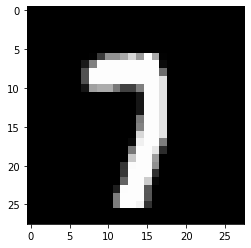

Prediction:  [7]
Label:  7


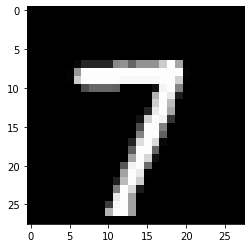

Prediction:  [3]
Label:  3


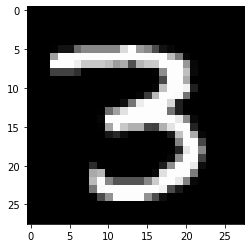

Prediction:  [8]
Label:  8


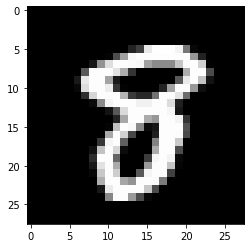

Prediction:  [4]
Label:  4


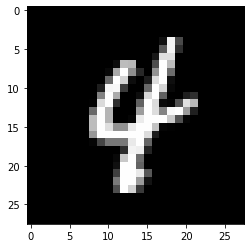

In [200]:
test_prediction(20, W1, b1, W2, b2)
test_prediction(50, W1, b1, W2, b2)
test_prediction(70, W1, b1, W2, b2)
test_prediction(90, W1, b1, W2, b2)
test_prediction(100, W1, b1, W2, b2)

Prediction:  [8]
Label:  0


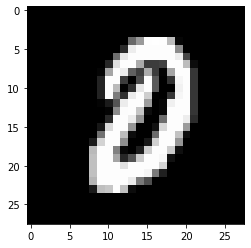

In [207]:
test_prediction(7, W1, b1, W2, b2)

The last prediction is wrong. As you can see though, it can appear to be an 8. Hence our neural network is performing better than expected. 